This is a code that takes the hyperparamter tuned information and using that info it is used to create a new model accordingly and is trained on 250 epohs with early stopping

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/face-mask-detection/Dataset/without_mask/2664.png
/kaggle/input/face-mask-detection/Dataset/without_mask/2539.png
/kaggle/input/face-mask-detection/Dataset/without_mask/1231.png
/kaggle/input/face-mask-detection/Dataset/without_mask/1017.png
/kaggle/input/face-mask-detection/Dataset/without_mask/2437.png
/kaggle/input/face-mask-detection/Dataset/without_mask/2015.png
/kaggle/input/face-mask-detection/Dataset/without_mask/2300.png
/kaggle/input/face-mask-detection/Dataset/without_mask/2673.png
/kaggle/input/face-mask-detection/Dataset/without_mask/2823.png
/kaggle/input/face-mask-detection/Dataset/without_mask/1522.png
/kaggle/input/face-mask-detection/Dataset/without_mask/2064.png
/kaggle/input/face-mask-detection/Dataset/without_mask/641.png
/kaggle/input/face-mask-detection/Dataset/without_mask/1088.png
/kaggle/input/face-mask-detection/Dataset/without_mask/173.png
/kaggle/input/face-mask-detection/Dataset/without_mask/2851.png
/kaggle/input/face-mask-detection/Dataset/

# Downloading the dataset from kaggle dataset to use on our notebook

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vijaykumar1799/face-mask-detection")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/face-mask-detection


# Install clearml

In [3]:
!pip install clearml

# Import Dependencies

In [4]:
import tensorflow as tf
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.optimizers import Adam

2025-10-04 10:04:52.026857: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759572292.049706    6532 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759572292.056795    6532 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Clear ML connection and configuration

In [ ]:
%env CLEARML_WEB_HOST=https://app.clear.ml/
%env CLEARML_API_HOST=https://api.clear.ml
%env CLEARML_FILES_HOST=https://files.clear.ml
%env CLEARML_API_ACCESS_KEY=xxx
%env CLEARML_API_SECRET_KEY=xxx

: 

In [6]:
import clearml
from clearml import Task

# Create a ClearML Task
task = Task.init(
    project_name="CNN Experiment Hypertuned",   # Group runs inside this project
    task_name="Hyper Params Tuned 250 epochs",           # Each run gets a task
    task_type=Task.TaskTypes.training       # Tell ClearML this is a training run
)

ClearML Task: created new task id=515f3662319a46c3ac41f46376a73956
2025-10-04 10:04:59,913 - clearml.Repository Detection - WARNING - Jupyter Notebook auto-logging failed, could not access: /kaggle/working/__notebook_source__.ipynb
2025-10-04 10:04:59,918 - clearml.Task - INFO - Storing jupyter notebook directly as code
ClearML results page: https://app.clear.ml/projects/6170c93714c841ab88174042bb45fb16/experiments/515f3662319a46c3ac41f46376a73956/output/log
ClearML Monitor: Could not detect iteration reporting, falling back to iterations as seconds-from-start


# Obtained hyperparameters from the hyperparameter tuning

In [7]:
# Hyperparameters
hp = {
    'conv_layers': 5,
    'filters_0': 32, 'kernel_size_0': 3, 'activation_0': 'relu', 'l2_0': 0.006, 'batch_norm_0': False,
    'filters_1': 64, 'kernel_size_1': 3, 'activation_1': 'leaky_relu', 'l2_1': 0.006, 'batch_norm_1': True,
    'filters_2': 32, 'kernel_size_2': 3, 'activation_2': 'relu', 'l2_2': 0.006, 'batch_norm_2': False,
    'filters_3': 32, 'kernel_size_3': 3, 'activation_3': 'relu', 'l2_3': 0.003, 'batch_norm_3': False,
    'filters_4': 32, 'kernel_size_4': 5, 'activation_4': 'leaky_relu', 'l2_4': 0.01, 'batch_norm_4': True,
    'dense_units': 64, 'dense_l2': 0.004,
    'second_dense': True, 'dense_units2': 256, 'dense2_l2': 0.002,
    'dropout': False, 'dropout_rate': 0.3,
    'learning_rate': 0.00011079637617355325,
    'optimizer': 'adam'
}
task.connect(hp)

{'conv_layers': 5,
 'filters_0': 32,
 'kernel_size_0': 3,
 'activation_0': 'relu',
 'l2_0': 0.006,
 'batch_norm_0': False,
 'filters_1': 64,
 'kernel_size_1': 3,
 'activation_1': 'leaky_relu',
 'l2_1': 0.006,
 'batch_norm_1': True,
 'filters_2': 32,
 'kernel_size_2': 3,
 'activation_2': 'relu',
 'l2_2': 0.006,
 'batch_norm_2': False,
 'filters_3': 32,
 'kernel_size_3': 3,
 'activation_3': 'relu',
 'l2_3': 0.003,
 'batch_norm_3': False,
 'filters_4': 32,
 'kernel_size_4': 5,
 'activation_4': 'leaky_relu',
 'l2_4': 0.01,
 'batch_norm_4': True,
 'dense_units': 64,
 'dense_l2': 0.004,
 'second_dense': True,
 'dense_units2': 256,
 'dense2_l2': 0.002,
 'dropout': False,
 'dropout_rate': 0.3,
 'learning_rate': 0.00011079637617355325,
 'optimizer': 'adam'}

# Setting Parameters(Defining Constants) and connecting with ClearML

In [8]:
params = {
    "IMAGE_SIZE": 128,   # Height/Width of images
    "BATCH_SIZE": 64,
    "CHANNELS": 3,
    "EPOCHS": 50
}

task.connect(params)


{'IMAGE_SIZE': 128, 'BATCH_SIZE': 64, 'CHANNELS': 3, 'EPOCHS': 50}

In [9]:
IMAGE_SIZE = params["IMAGE_SIZE"]
BATCH_SIZE = params["BATCH_SIZE"]
CHANNELS = params["CHANNELS"]
EPOCHS = params["EPOCHS"]

# Create dataset from directory of images (Load Datas into tf dataset)

In [10]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory="/kaggle/input/face-mask-detection/Dataset",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 8982 files belonging to 3 classes.


I0000 00:00:1759572303.818875    6532 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [11]:
class_names=dataset.class_names
class_names

['mask_weared_incorrect', 'with_mask', 'without_mask']

# Train Test Split

In [12]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [13]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [14]:
len(train_ds)

112

In [15]:
len(val_ds)

14

In [16]:
len(test_ds)

15

# Cache, Shuffle, and Prefetch the Dataset

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE) #if gpu is busy training, then prefetch will load the next set of batch from the disk
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

: 

# Data Augmentation

In [18]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255),
])

In [19]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

# Building Model according to the hyperparameters set above

In [20]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes=3

In [21]:
# Activation helper
def get_activation(name):
    if name == "relu":
        return layers.ReLU()
    elif name == "leaky_relu":
        return layers.LeakyReLU()
    else:
        return layers.Activation(name)

In [22]:
# Add an Input layer first
model = models.Sequential()
model.add(layers.Input(shape=input_shape))   # define input here

for i in range(hp['conv_layers']):
    filters = hp[f'filters_{i}']
    kernel = hp[f'kernel_size_{i}']
    l2_reg = hp[f'l2_{i}']
    activation = get_activation(hp[f'activation_{i}'])
    batch_norm = hp[f'batch_norm_{i}']
    
    model.add(layers.Conv2D(filters, kernel, padding='same',
                            kernel_regularizer=regularizers.l2(l2_reg)))
    model.add(activation)
    
    if batch_norm:
        model.add(layers.BatchNormalization())
    
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(hp['dense_units'],
                       kernel_regularizer=regularizers.l2(hp['dense_l2']),
                       activation='relu'))

if hp['second_dense']:
    model.add(layers.Dense(hp['dense_units2'],
                           kernel_regularizer=regularizers.l2(hp['dense2_l2']),
                           activation='relu'))

if hp['dropout']:
    model.add(layers.Dropout(hp['dropout_rate']))

model.add(layers.Dense(n_classes, activation='softmax'))


In [23]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 32)       │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 8, 8, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,363 (481.89 KB)

 Trainable params: 123,171 (481.14 KB)

 Non-trainable params: 192 (768.00 B)

# Model Compile

In [24]:
# Compile
optimizer = Adam(learning_rate=hp['learning_rate'])
model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

##### Add Early stopping callbacks

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
early_stop = EarlyStopping(
    monitor='val_loss',   # you can also use 'val_accuracy'
    patience=10,           # number of epochs with no improvement before stopping
    verbose=1,
    min_delta=0.001, 
     mode='auto', 
    restore_best_weights=True  # restores model from the epoch with best val_loss
)

# Train the model 

In [27]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=250,
    callbacks=[early_stop]
)

Epoch 1/250


I0000 00:00:1759572315.578053    6604 service.cc:148] XLA service 0x799be8088360 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1759572315.578102    6604 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1759572315.970769    6604 cuda_dnn.cc:529] Loaded cuDNN version 90300


 12/112 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6364 - loss: 2.4222

I0000 00:00:1759572319.511651    6604 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


112/112 ━━━━━━━━━━━━━━━━━━━━ 24s 97ms/step - accuracy: 0.7991 - loss: 2.1086 - val_accuracy: 0.8393 - val_loss: 1.9074
Epoch 2/250
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9415 - loss: 1.6501 - val_accuracy: 0.9475 - val_loss: 1.6266
Epoch 3/250
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9671 - loss: 1.4845 - val_accuracy: 0.9810 - val_loss: 1.4064
Epoch 4/250
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9857 - loss: 1.3514 - val_accuracy: 0.9743 - val_loss: 1.3117
Epoch 5/250
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9895 - loss: 1.2512 - val_accuracy: 0.9777 - val_loss: 1.2176
Epoch 6/250
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9919 - loss: 1.1648 - val_accuracy: 0.9933 - val_loss: 1.1198
Epoch 7/250
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9947 - loss: 1.0928 - val_accuracy: 0.9978 - val_loss: 1.0423
Epoch 8/250
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9971 - loss: 1.0200 - val_accurac

# Draw plots

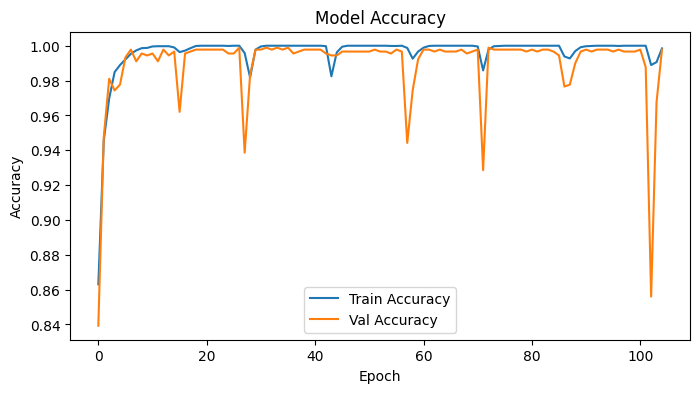

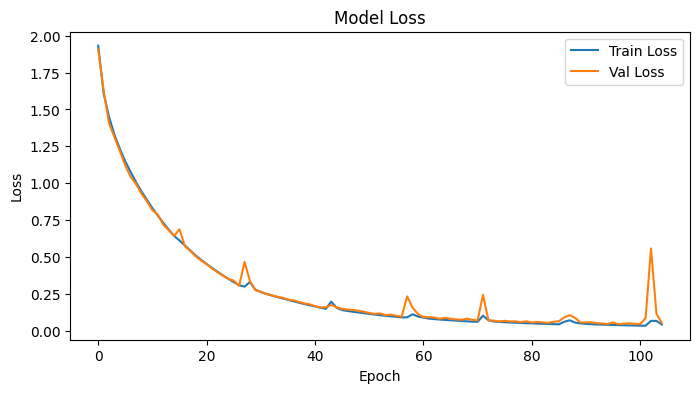

In [28]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.savefig("accuracy_plot.png")
plt.show()


# Loss plot
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.savefig("loss_plot.png")
plt.show()



# Manually logs metrics(loss and accuray) to ClearML

In [29]:
for epoch in range(EPOCHS):
    history = model.fit(train_ds, validation_data=val_ds, epochs=1, verbose=1)
    
    # Scalars
    train_loss = history.history['loss'][-1]
    val_loss = history.history['val_loss'][-1]
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]

    logger = task.get_logger()
    logger.report_scalar("Loss", "train", train_loss, iteration=epoch)
    logger.report_scalar("Loss", "val", val_loss, iteration=epoch)
    logger.report_scalar("Accuracy", "train", train_acc, iteration=epoch)
    logger.report_scalar("Accuracy", "val", val_acc, iteration=epoch)


112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 1.0000 - loss: 0.0404 - val_accuracy: 0.9967 - val_loss: 0.0502
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 1.0000 - loss: 0.0390 - val_accuracy: 0.9978 - val_loss: 0.0468
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 1.0000 - loss: 0.0383 - val_accuracy: 0.9978 - val_loss: 0.0480
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 1.0000 - loss: 0.0373 - val_accuracy: 0.9967 - val_loss: 0.0540
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 1.0000 - loss: 0.0367 - val_accuracy: 0.9978 - val_loss: 0.0462
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 1.0000 - loss: 0.0359 - val_accuracy: 0.9967 - val_loss: 0.0535
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 1.0000 - loss: 0.0353 - val_accuracy: 0.9978 - val_loss: 0.0442
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 1.0000 - loss: 0.0345 - val_accuracy: 0.9978 - val_loss: 0.0432
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 1.

# Save the tuned and trained model and pickle file

In [33]:
# Save locally
model.save("best_mask_cnn_hypertuned_250epochs.keras")

# Upload to ClearML
task.update_output_model(model_path="best_mask_cnn_hypertuned_250epochs.keras", name="Hypertuned_250epochs")

print("Best Mask CNN Model has been saved locally and uploaded to ClearML successfully!")


Best Mask CNN Model has been saved locally and uploaded to ClearML successfully!
2025-10-04 10:13:50,023 - clearml.Task - INFO - Completed model upload to https://files.clear.ml/CNN%20Experiment%20Hypertuned/Hyper%20Params%20Tuned%20250%20epochs.515f3662319a46c3ac41f46376a73956/models/best_mask_cnn_hypertuned_250epochs.keras


In [31]:
import os
import pickle

# 1. Save the trained model in /kaggle/working/
model_path = "/kaggle/working/best_mask_cnn_hypertuned_250epochs.keras"
model.save(model_path)
print(f"Model saved at: {model_path}")

# 2. Save training history as pickle file
history_path = "/kaggle/working/history_hypertuned_250epochs.pkl"
with open(history_path, "wb") as f:
    pickle.dump(history.history, f)

print(f"Training history saved at: {history_path}")

2025-10-04 10:10:17,684 - clearml.frameworks - INFO - Found existing registered model id=105dfd0783f14a7c843185be0912f931 [/kaggle/working/best_mask_cnn_hypertuned_250epochs.keras] reusing it.
2025-10-04 10:10:18,007 - clearml.Task - INFO - Completed model upload to https://files.clear.ml/CNN%20Experiment%20Hypertuned/Hyper%20Params%20Tuned%20250%20epochs.515f3662319a46c3ac41f46376a73956/models/best_mask_cnn_hypertuned_250epochs.keras
Model saved at: /kaggle/working/best_mask_cnn_hypertuned_250epochs.keras
Training history saved at: /kaggle/working/history_hypertuned_250epochs.pkl


# Confusion Matrix

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


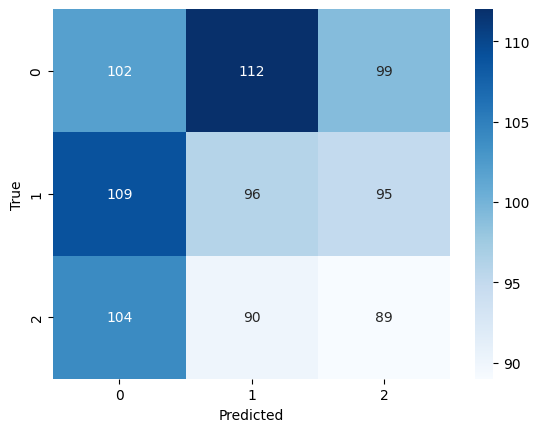

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(val_ds)
y_pred_classes = y_pred.argmax(axis=1)
y_true = np.concatenate([y for x, y in val_ds], axis=0)

cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Classification report heatmap

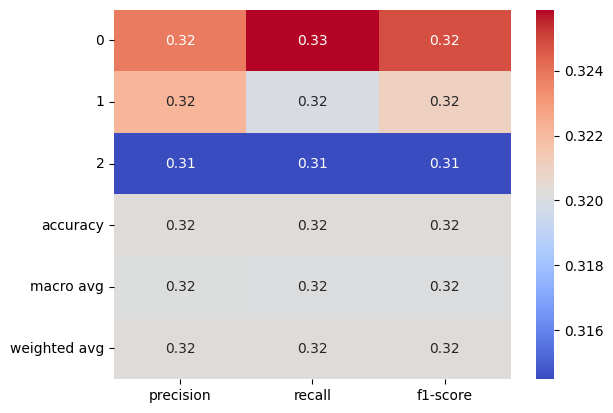

In [44]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(y_true, y_pred_classes, output_dict=True)
df = pd.DataFrame(report).iloc[:-1, :].T
sns.heatmap(df, annot=True, cmap="coolwarm")
plt.show()


# To close/End the ClearML task

In [48]:
task.close()